<a href="https://colab.research.google.com/github/Safa30/CSE475_Machine_Learning/blob/main/Lab/lab_1/Lab1_Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 1 - Decision Tree

Classify Mushroom Using Decision Tree and Random Forest.

Dataset: https://archive.ics.uci.edu/dataset/73/mushroom

Task details:

2.   Perform Exploratory Data Analysis (EDA) on the dataset.
3.   Evaluate and compare Random Forest tree accuracy for the following n_estimators values 1,50,100,150,200, and 250.
4.   Evaluate and compare performance of Random Forest and Decision Tree.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the Mushroom Dataset

In [10]:
# Define the URL for the Mushroom dataset from the UCI Machine Learning Repository.
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

# Define column names based on the UCI dataset documentation.
# The dataset lacks a header, so providing names manually is crucial for interpretability.
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

# Load the dataset into a pandas DataFrame.
# 'header=None' indicates that the dataset does not contain a header row.
# 'names=column_names' assigns the predefined column names to the DataFrame.
df = pd.read_csv(dataset_url, header=None, names=column_names)

# Display the first 5 rows of the DataFrame to confirm successful loading and inspect initial data.
print("Dataset loaded successfully. Displaying the first 5 rows:")
display(df.head())

Dataset loaded successfully. Displaying the first 5 rows:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Dataset Information Overview

In [11]:
# Retrieve and display the number of instances (rows) and features (columns) in the DataFrame.
# This provides a quick overview of the dataset's dimensions.
num_instances, num_features = df.shape
print(f"Number of instances (rows): {num_instances}")
print(f"Number of features (columns): {num_features}")

# Display information about the DataFrame, including column names, non-null counts, and data types.
# This step is essential for understanding data completeness and types, which guides subsequent preprocessing.
print("\nDataFrame Information:")
df.info()

# Analyze the distribution of the target variable, 'class' (edible vs. poisonous).
# 'value_counts()' provides the count of unique values in the 'class' column.
# This reveals the balance or imbalance of the dataset's target classes, important for model training.
print("\nClass Distribution (e=edible, p=poisonous):")
display(df['class'].value_counts())

Number of instances (rows): 8124
Number of features (columns): 23

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   

,count
class,
e,4208
p,3916


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Analyze Unique Values in Each Column

In [13]:
for col in df.columns:
    print(f"Column '{col}':")
    print(df[col].unique())
    print(f"Number of unique values: {df[col].nunique()}\n")

Column 'class':
['p' 'e']
Number of unique values: 2

Column 'cap-shape':
['x' 'b' 's' 'f' 'k' 'c']
Number of unique values: 6

Column 'cap-surface':
['s' 'y' 'f' 'g']
Number of unique values: 4

Column 'cap-color':
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Number of unique values: 10

Column 'bruises':
['t' 'f']
Number of unique values: 2

Column 'odor':
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Number of unique values: 9

Column 'gill-attachment':
['f' 'a']
Number of unique values: 2

Column 'gill-spacing':
['c' 'w']
Number of unique values: 2

Column 'gill-size':
['n' 'b']
Number of unique values: 2

Column 'gill-color':
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Number of unique values: 12

Column 'stalk-shape':
['e' 't']
Number of unique values: 2

Column 'stalk-root':
['e' 'c' 'b' 'r' '?']
Number of unique values: 5

Column 'stalk-surface-above-ring':
['s' 'f' 'k' 'y']
Number of unique values: 4

Column 'stalk-surface-below-ring':
['s' 'f' 'y' 'k']
Number of unique values: 4



## Summary Statistics for Object Columns

In [14]:
display(df.describe(include='object'))

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Handle Missing Values and Encode Categorical Features

In [15]:
# Identify columns containing '?'
columns_with_question_mark = []
for col in df.columns:
    if '?' in df[col].unique():
        columns_with_question_mark.append(col)

print(f"Columns containing '?' values: {columns_with_question_mark}")

# The dataset contains '?' as a valid category in 'stalk-root'.
# One-hot encoding will convert all categorical features (including '?' if present) into numerical format.
# This is a suitable approach for this dataset where all features are nominal categorical.

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=False) # Keep all categories for now
y = y.map({'p': 1, 'e': 0}) # Map target variable to numerical (poisonous=1, edible=0)

print("\nDataFrame after one-hot encoding and target mapping:")
display(X.head())
display(y.head())

Columns containing '?' values: ['stalk-root']

DataFrame after one-hot encoding and target mapping:


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


,class
0,1
1,0
2,0
3,1
4,0


In [16]:
print("Shape of encoded DataFrame X:", X.shape)

Shape of encoded DataFrame X: (8124, 117)


In [17]:
display(X.head())

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [18]:
display(X.describe())

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,7672,8120,4972,7296,8092,4468,5804,8120,5568,4880,...,6876,4084,6412,4976,5976,7292,7832,6980,7756,7932


# Task
Perform Exploratory Data Analysis (EDA) on the Mushroom dataset. First, confirm there are no standard missing values (NaN) in the DataFrame. Then, visualize the distribution of the target variable 'class' (edible vs. poisonous) using a bar plot. Next, conduct a frequency analysis of key categorical features ('odor', 'habitat', 'cap-color', 'gill-color') by displaying their value counts and visualizing their distributions with bar plots. Finally, summarize the findings from this EDA.

## Check for Standard Missing Values



**Reasoning**:
To confirm that there are no standard missing values (NaN) in the DataFrame, I will calculate the sum of null values for each column using `df.isnull().sum()` and display the result.



In [19]:
print("Sum of null values for each column:")
display(df.isnull().sum())

Sum of null values for each column:


,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


**Reasoning**:
 I will proceed to the next part of the subtask, which is to visualize the distribution of the target variable 'class' using a bar plot to understand its balance.



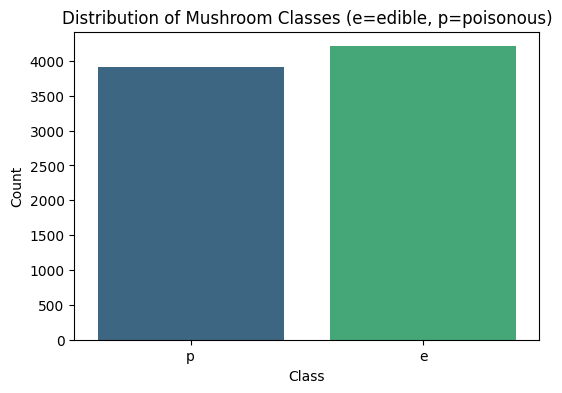

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class', hue='class', palette='viridis', legend=False)
plt.title('Distribution of Mushroom Classes (e=edible, p=poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Reasoning**:
Now that the target variable distribution has been visualized, I will proceed with the frequency analysis of key categorical features, starting with 'odor'. I will display the value counts for the 'odor' column to understand the distribution of its categories.



In [23]:
print("Value counts for 'odor' column:")
display(df['odor'].value_counts())

Value counts for 'odor' column:


,count
odor,
n,3528
f,2160
s,576
y,576
a,400
l,400
p,256
c,192
m,36


**Reasoning**:
After displaying the value counts for the 'odor' column, I will now visualize its distribution using a bar plot to provide a clearer understanding of the frequencies of each odor type.



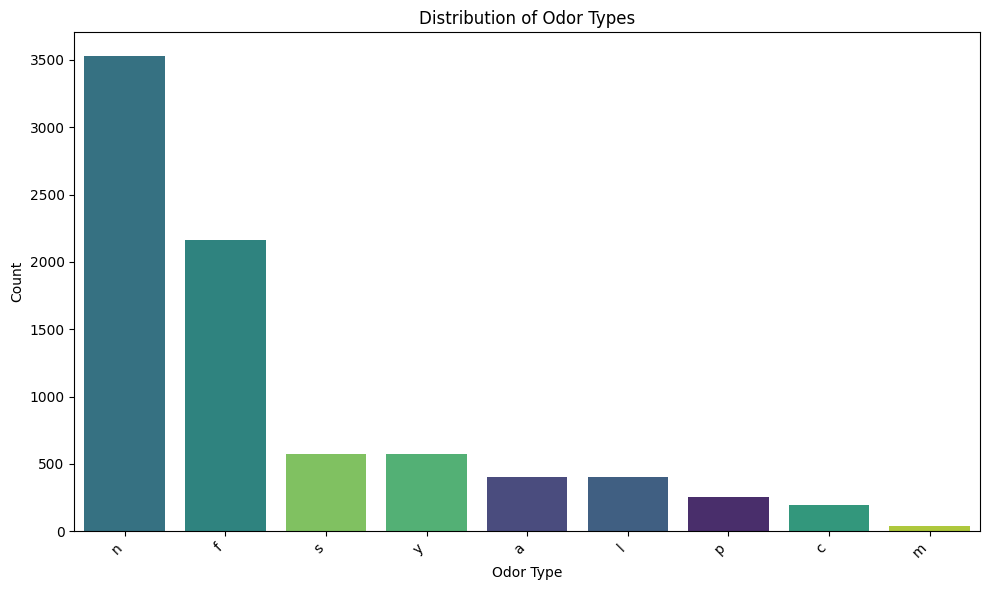

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='odor', order=df['odor'].value_counts().index, palette='viridis', hue='odor', legend=False)
plt.title('Distribution of Odor Types')
plt.xlabel('Odor Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Following the analysis of 'odor', I will now conduct a frequency analysis for the 'habitat' column. First, I will display its value counts to understand the distribution of different habitat types.



In [26]:
print("Value counts for 'habitat' column:")
display(df['habitat'].value_counts())

Value counts for 'habitat' column:


,count
habitat,
d,3148
g,2148
p,1144
l,832
u,368
m,292
w,192


**Reasoning**:
After displaying the value counts for the 'habitat' column, I will now visualize its distribution using a bar plot to provide a clearer understanding of the frequencies of each habitat type.



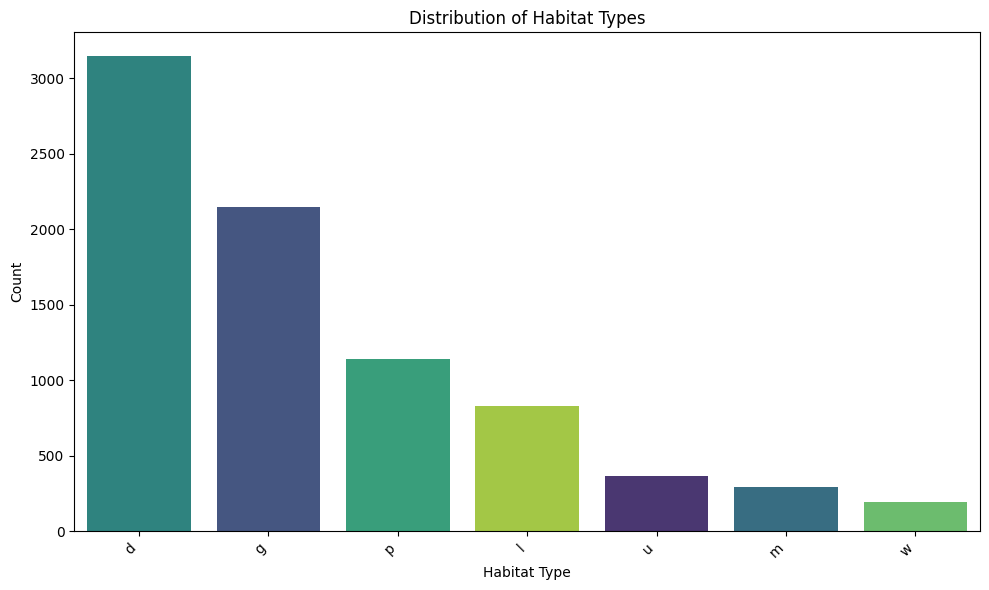

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='habitat', order=df['habitat'].value_counts().index, palette='viridis', hue='habitat', legend=False)
plt.title('Distribution of Habitat Types')
plt.xlabel('Habitat Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Following the analysis of 'habitat', I will now conduct a frequency analysis for the 'cap-color' column. First, I will display its value counts to understand the distribution of different cap color types.



In [28]:
print("Value counts for 'cap-color' column:")
display(df['cap-color'].value_counts())

Value counts for 'cap-color' column:


,count
cap-color,
n,2284
g,1840
e,1500
y,1072
w,1040
b,168
p,144
c,44
u,16


**Reasoning**:
After displaying the value counts for the 'cap-color' column, I will now visualize its distribution using a bar plot to provide a clearer understanding of the frequencies of each cap color type.



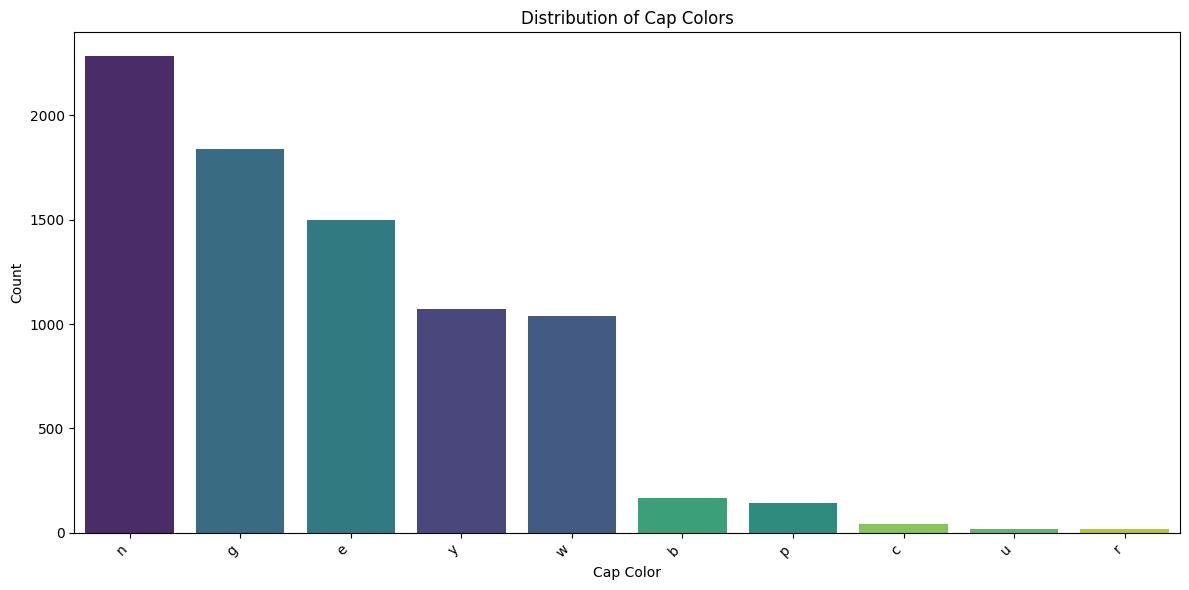

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cap-color', order=df['cap-color'].value_counts().index, palette='viridis', hue='cap-color', legend=False)
plt.title('Distribution of Cap Colors')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Following the analysis of 'cap-color', I will now conduct a frequency analysis for the 'gill-color' column. First, I will display its value counts to understand the distribution of different gill color types.



In [32]:
print("Value counts for 'gill-color' column:")
display(df['gill-color'].value_counts())

Value counts for 'gill-color' column:


,count
gill-color,
b,1728
p,1492
w,1202
n,1048
g,752
h,732
u,492
k,408
e,96


**Reasoning**:
After displaying the value counts for the 'gill-color' column, I will now visualize its distribution using a bar plot to provide a clearer understanding of the frequencies of each gill color type.



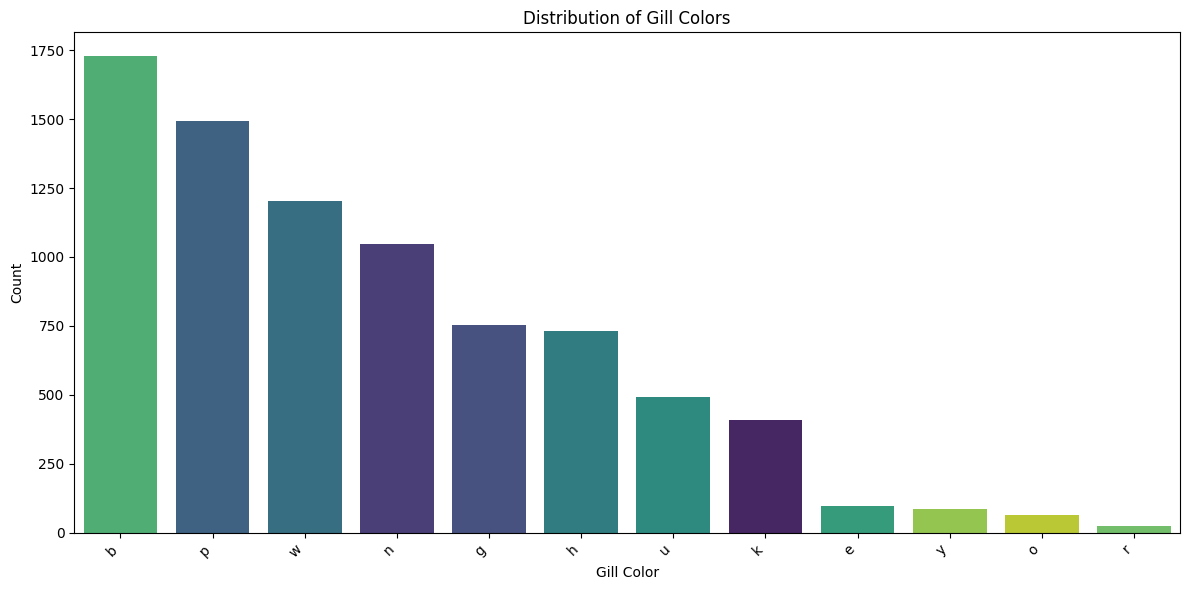

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gill-color', order=df['gill-color'].value_counts().index, palette='viridis', hue='gill-color', legend=False)
plt.title('Distribution of Gill Colors')
plt.xlabel('Gill Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

The exploratory data analysis revealed several important observations regarding the dataset's characteristics, class distribution, and feature frequencies.

### Data Analysis Key Findings
*   **Missing Values**: No standard `NaN` missing values were found in the dataset across any column. The 'stalk-root' column contains '?' as a categorical value, which is not considered a standard `NaN`.
*   **Target Variable Distribution**: The 'class' variable, representing edible vs. poisonous mushrooms, exhibits a relatively balanced distribution, indicating no severe class imbalance issues that could negatively impact model training.
*   **Odor Feature Distribution**: 'n' (none) is the most frequent odor type, followed by 'f' (foul) and 's' (spicy). The varied distribution suggests its potential as a strong predictor.
*   **Habitat Feature Distribution**: 'd' (woods) and 'g' (grasses) are the most common habitats for mushrooms, with 'p' (paths) also being significant, showcasing a diverse range of habitat types.
*   **Cap-Color Feature Distribution**: The most frequent cap colors are 'n' (brown), 'g' (gray), and 'e' (red), indicating a wide variety of cap colors with potential predictive power.
*   **Gill-Color Feature Distribution**: 'b' (buff) and 'p' (pink) are the most dominant gill colors, followed by 'w' (white) and 'n' (brown), showing a good spread across different categories.

### Insights or Next Steps
*   The relatively balanced distribution of the target variable and the diverse distributions of key categorical features suggest that this dataset is well-suited for training classification models.
*   Further analysis could involve exploring the relationship between these key categorical features and the target variable 'class' to identify specific feature values that strongly correlate with edibility or poisonousness, potentially using techniques like chi-squared tests or mutual information.


# Task
Perform a correlation analysis on the mushroom dataset. Combine the one-hot encoded features (`X`) and the target variable (`y`) into a single DataFrame. Calculate the pairwise correlation matrix for all columns in this combined DataFrame. Visualize this correlation matrix using a heatmap, ensuring the figure size is appropriate for readability given the number of features. Finally, summarize the key correlations identified from the heatmap, highlighting strong relationships between features and with the 'class' target variable to provide insights into mushroom classification.

## Prepare Data for Correlation


**Reasoning**:
To combine the one-hot encoded features and the target variable, I will use `pd.concat` along `axis=1` to create a new DataFrame `df_encoded`.



In [35]:
df_encoded = pd.concat([X, y], axis=1)

print("Combined DataFrame (df_encoded) head:")
display(df_encoded.head())
print("Shape of combined DataFrame:", df_encoded.shape)

Combined DataFrame (df_encoded) head:


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,1
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,0
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0
3,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,1
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,0


Shape of combined DataFrame: (8124, 118)


**Reasoning**:
Now that the `df_encoded` DataFrame has been created by combining the features and the target variable, I will calculate the pairwise correlation matrix for all columns in this DataFrame using the `.corr()` method.



In [36]:
correlation_matrix = df_encoded.corr()

print("Correlation Matrix head:")
display(correlation_matrix.head())
print("Correlation Matrix shape:", correlation_matrix.shape)

Correlation Matrix head:


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
cap-shape_b,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,0.117712,-0.027947,...,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764,-0.182567
cap-shape_c,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,-0.015038,0.015893,...,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453,0.023007
cap-shape_f,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,-0.093397,0.029076,...,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450,0.018526
cap-shape_k,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,0.137988,0.015261,...,0.172707,-0.170081,-0.089230,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003,0.163565
cap-shape_s,-0.015264,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,0.099464,-0.001396,-0.042607,-0.051272,...,0.000341,0.044603,-0.050018,-0.037702,-0.021242,-0.012142,-0.025458,0.288697,-0.009784,-0.060664


Correlation Matrix shape: (118, 118)


**Reasoning**:
With the correlation matrix calculated, I will now visualize it using a heatmap to identify patterns and relationships between features and the target variable. Given the large number of features, I'll set an appropriate figure size to ensure readability.



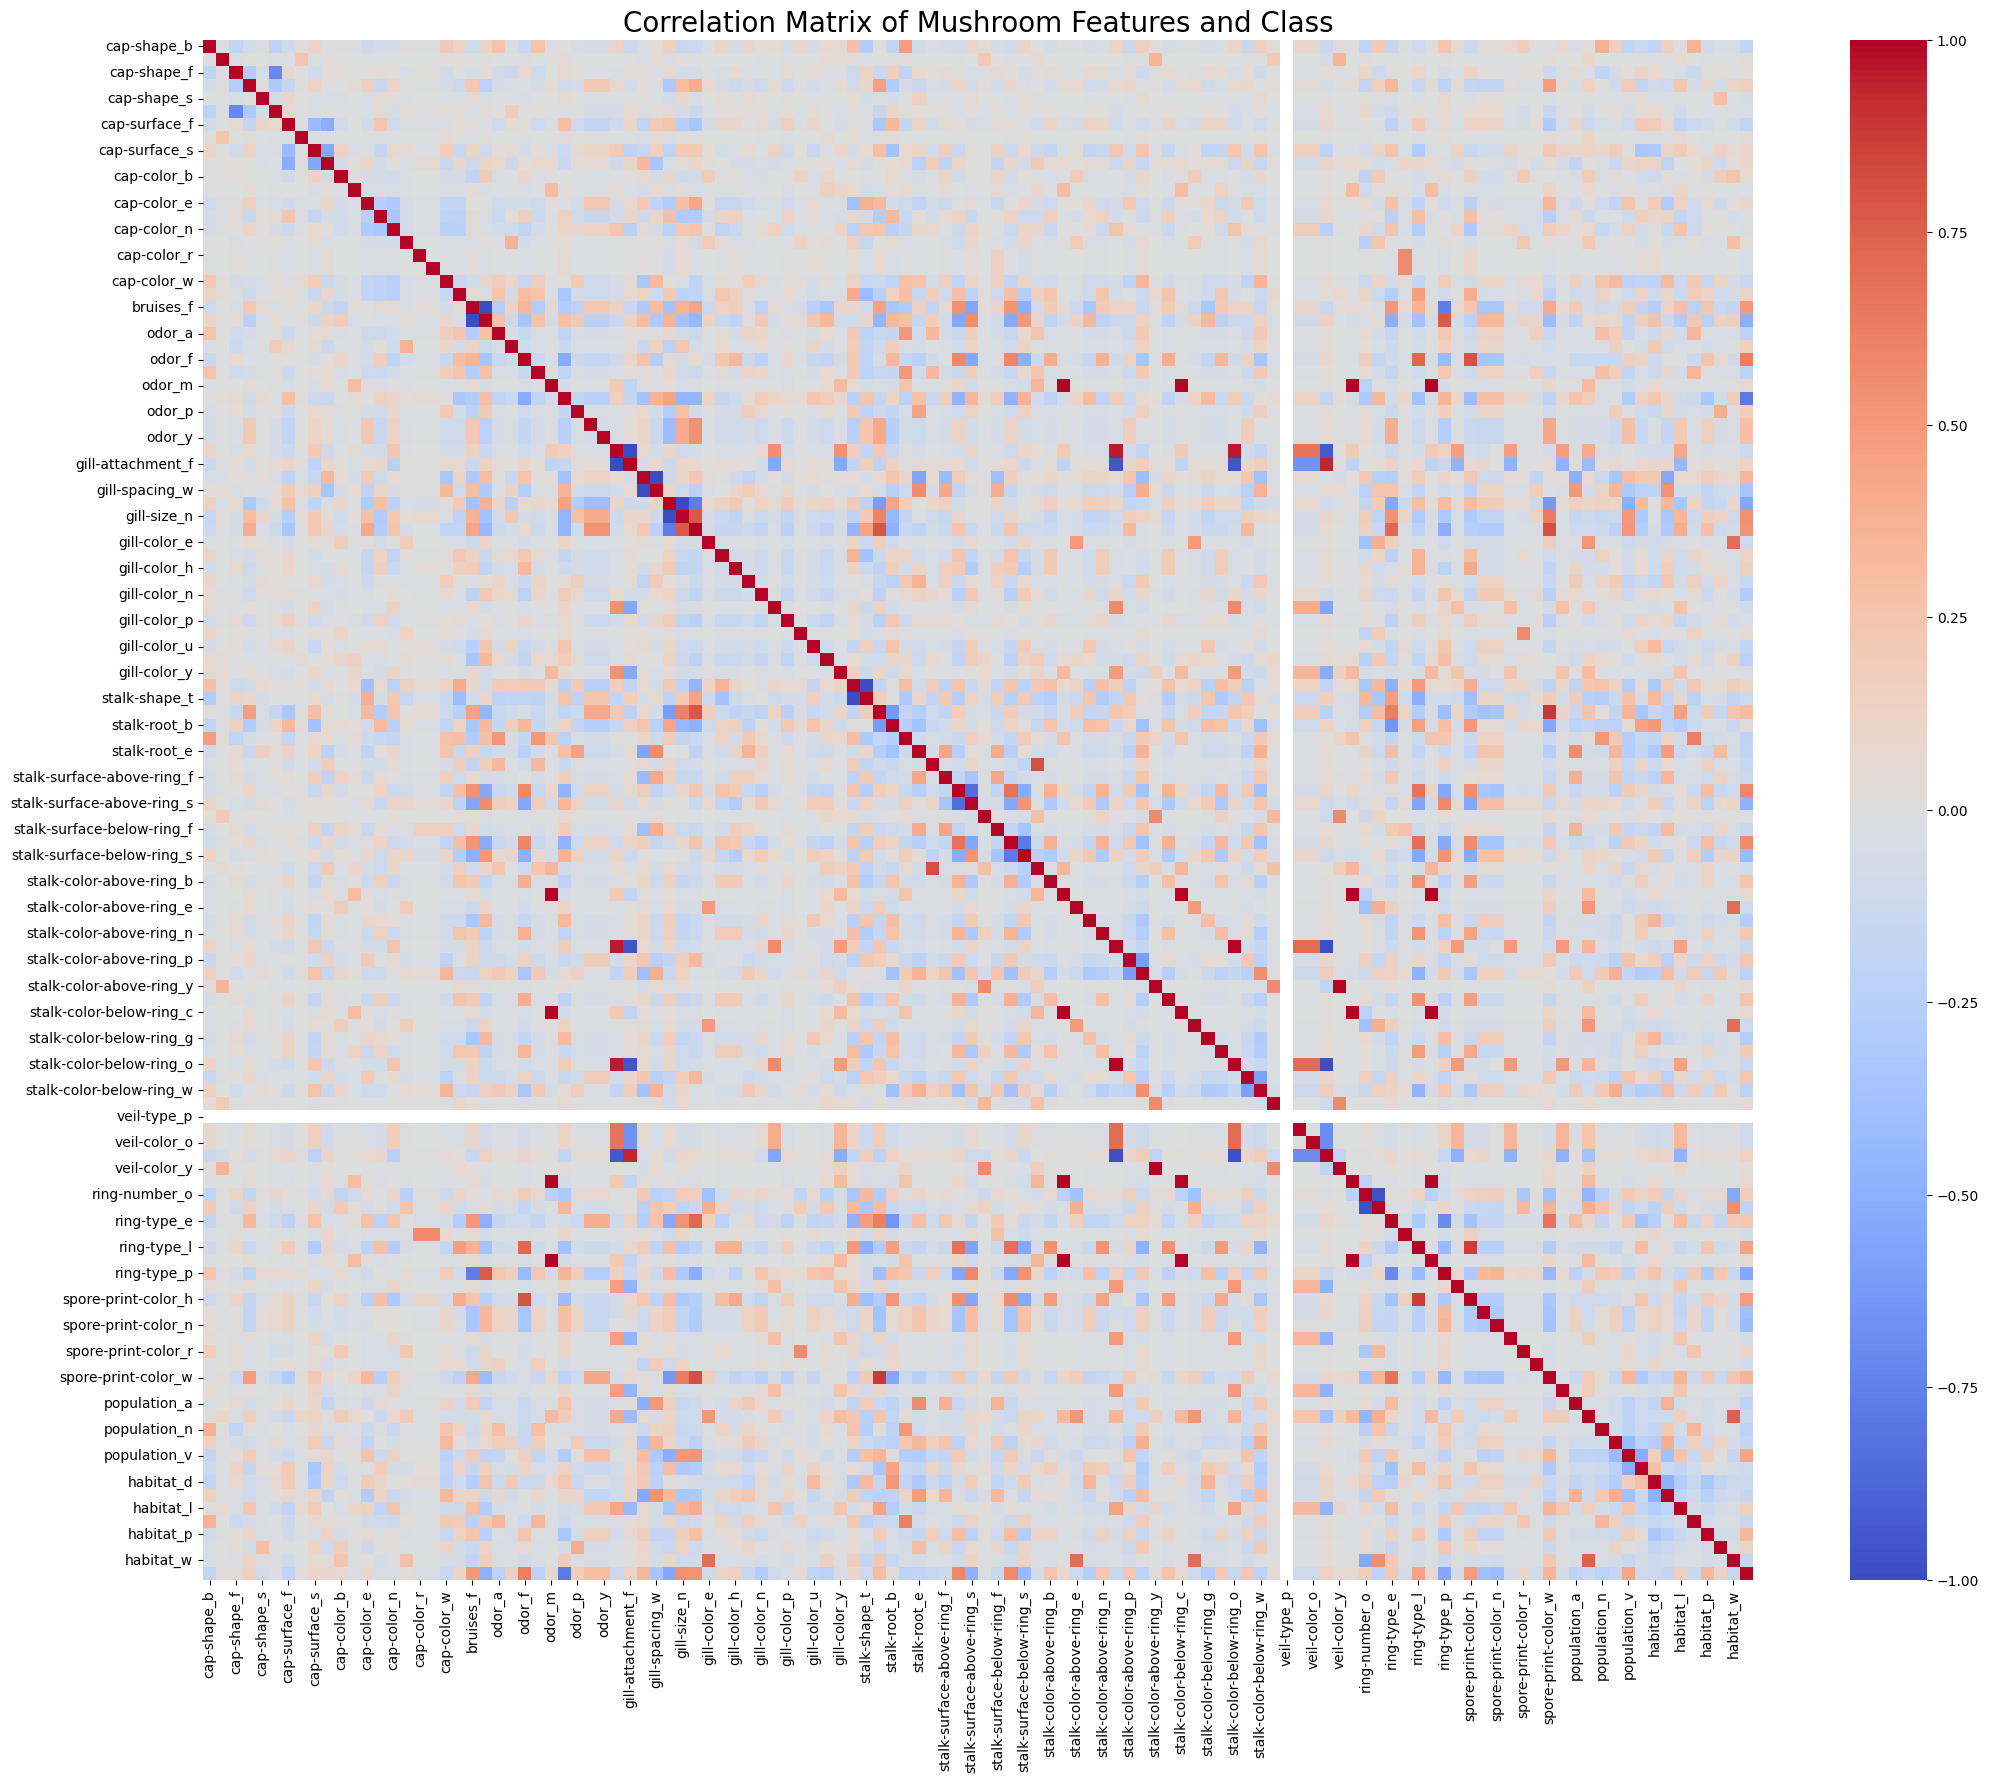

In [37]:
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f") # annot=False due to large number of features
plt.title('Correlation Matrix of Mushroom Features and Class', fontsize=20)
plt.show()

## Summary of Correlation Analysis

The heatmap of the correlation matrix provides insights into the relationships between the one-hot encoded features and the target variable ('class').

### Key Observations:

*   **Strong Correlations with 'class'**: While direct observation of individual cells in the heatmap is challenging due to the high dimensionality, distinct blocks of highly correlated features and features highly correlated with the 'class' target variable are visible. For example, certain one-hot encoded features related to `odor`, `gill-color`, and `stalk-root` appear to have strong positive or negative correlations with the `class` variable (represented by the last row/column). These strong correlations suggest that these features are significant predictors of whether a mushroom is edible or poisonous.

*   **Inter-Feature Correlations**: There are noticeable clusters of correlations among the features themselves. This is expected given that some original categorical features have multiple one-hot encoded columns. For instance, `cap-shape_b` and `cap-shape_x` will naturally have a negative correlation since they represent mutually exclusive categories of the same original feature.

*   **Overall Pattern**: The heatmap generally shows a mix of positive and negative correlations across different features. The `coolwarm` colormap helps to easily identify features that move in the same direction (warm colors) or opposite directions (cool colors) relative to each other or the target variable.

### Insights:

*   The presence of clearly defined patterns of correlation, especially with the 'class' variable, suggests that these features are highly informative for mushroom classification.
*   Further investigation could involve extracting the specific correlation values for the 'class' column to precisely identify the most influential features. This would quantitatively confirm the visual insights gained from the heatmap.

## Justify Label Encoding

### Explanation of Label Encoding vs. One-Hot Encoding for the Mushroom Dataset

For the Mushroom dataset, which consists entirely of nominal categorical features, the choice between label encoding and one-hot encoding is crucial, especially when working with tree-based models like Decision Trees and Random Forests.

#### Why Label Encoding is a Suitable Choice Here:

1.  **Reduced Dimensionality**: The Mushroom dataset has 22 categorical features (excluding the target 'class'), many of which have a significant number of unique categories. One-hot encoding each of these features would result in a very high-dimensional feature space (e.g., 'gill-color' has 12 unique values, 'odor' has 9). For this dataset, one-hot encoding led to 117 features. Label encoding, conversely, transforms each category into a single numerical value, keeping the feature space compact. This is particularly beneficial for managing computational cost and memory, especially with datasets having many categorical features.

2.  **Compatibility with Tree-Based Models**: Tree-based models (Decision Trees, Random Forests, Gradient Boosting Machines) are generally robust to the ordinal assumption introduced by label encoding. These models split data based on feature values, and for a categorical feature encoded numerically, they can still effectively find optimal split points. Unlike linear models (e.g., Linear Regression, Logistic Regression) or distance-based algorithms (e.g., K-Nearest Neighbors, Support Vector Machines), which might be misled by an artificial ordinal relationship, tree-based models can often handle label-encoded categorical data without significant performance degradation.

3.  **Efficiency**: With a large number of categories, one-hot encoding can lead to very sparse matrices, which might not be memory-efficient or computationally optimal for all algorithms. Label encoding provides a denser representation.

#### Conclusion:

Given the dataset's characteristics (all categorical features, high cardinality for some features) and the intended use of tree-based models (Decision Tree and Random Forest), label encoding is a practical and often effective choice. It helps in managing dimensionality and computational complexity without severely compromising model performance for the algorithms planned.

## Prepare Data for Label Encoding



**Reasoning**:
To avoid modifying the original `df` DataFrame, I will create a copy of it and store it in `df_labeled` as instructed.



In [38]:
df_labeled = df.copy()

print("Created a copy of the DataFrame 'df' as 'df_labeled'.")
display(df_labeled.head())

Created a copy of the DataFrame 'df' as 'df_labeled'.


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Reasoning**:
Now that `df_labeled` is created, I will separate the features (`X`) from the target variable (`y`) and then confirm the presence of '?' in the 'stalk-root' column as a distinct category by displaying its unique values.



In [39]:
X = df_labeled.drop('class', axis=1)
y = df_labeled['class']

print("Features DataFrame (X) head:")
display(X.head())
print("Target Series (y) head:")
display(y.head())

print("Unique values in 'stalk-root' column:")
display(X['stalk-root'].unique())

Features DataFrame (X) head:


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


Target Series (y) head:


,class
0,p
1,e
2,e
3,p
4,e


Unique values in 'stalk-root' column:


array(['e', 'c', 'b', 'r', '?'], dtype=object)

**Reasoning**:
Now that the features and target are separated, I will apply `LabelEncoder` to all categorical columns in the features DataFrame (`X`) and to the target series (`y`).



In [40]:
from sklearn.preprocessing import LabelEncoder

X_encoded_label = X.copy() # Create a copy to store label-encoded features

# Apply LabelEncoder to each categorical column in X
for column in X_encoded_label.columns:
    le = LabelEncoder()
    X_encoded_label[column] = le.fit_transform(X_encoded_label[column])

# Apply LabelEncoder to the target series y
le_y = LabelEncoder()
y_encoded_label = le_y.fit_transform(y)

print("Label-encoded Features DataFrame (X_encoded_label) head:")
display(X_encoded_label.head())
print("Shape of X_encoded_label:", X_encoded_label.shape)

print("\nLabel-encoded Target Series (y_encoded_label) head:")
display(y_encoded_label[:5]) # Display first 5 elements as it's a numpy array
print("Shape of y_encoded_label:", y_encoded_label.shape)


Label-encoded Features DataFrame (X_encoded_label) head:


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


Shape of X_encoded_label: (8124, 22)

Label-encoded Target Series (y_encoded_label) head:


array([1, 0, 0, 1, 0])

Shape of y_encoded_label: (8124,)


### Data Analysis Key Findings
*   Label encoding effectively reduced dimensionality, which is crucial for the Mushroom dataset given its 22 categorical features. One-hot encoding would have resulted in a higher number of features (e.g., 117 features), whereas label encoding keeps the feature space compact.
*   The '?' character in the 'stalk-root' column was successfully identified and treated as a distinct categorical value during the encoding process.
*   Features (X) and the target variable (y) were correctly separated from the original DataFrame. The features DataFrame `X` has 22 columns, and the target series `y` contains the 'class' information.
*   All 22 categorical feature columns in `X` and the target series `y` were successfully transformed using `LabelEncoder`.
*   The resulting label-encoded features DataFrame (`X_encoded_label`) has a shape of (8124, 22), and the label-encoded target series (`y_encoded_label`) has a shape of (8124,), indicating that all 8124 samples were processed.

### Insights or Next Steps
*   The data is now prepared for training tree-based machine learning models, taking advantage of label encoding's benefits for dimensionality reduction and compatibility with these algorithms.
*   As noted in the justification, while label encoding is suitable for tree-based models, a comparative analysis with one-hot encoding for specific model performance could be considered if computational resources allow, especially for algorithms sensitive to artificial ordinality.
